<a href="https://www.kaggle.com/code/nguynngcph/nguyenngocphu-btcn-2?scriptVersionId=92458660" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nguyenngocphu-btcn60th1-2/spam_email.txt


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('../input/nguyenngocphu-btcn60th1-2/spam_email.txt',sep=' ')
onlydata=data.loc[:,'make':'cap_total']
onlydata.describe(include='all')

,make,address,all,3d,our,over,remove,internet,order,mail,...,conference,semicol,paren,bracket,bang,dollar,pound,cap_avg,cap_long,cap_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X=onlydata.values
yCG=data.values[:,57]
y=np.zeros((yCG.size))
y[yCG=='spam']=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
std_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

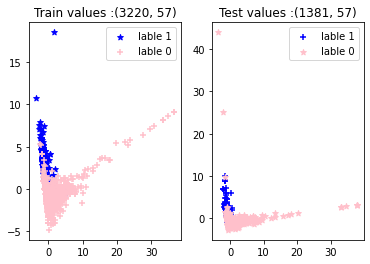

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)
fig, (plt_train, plt_test) = plt.subplots(1, 2)
data1=pca.fit_transform(X_train_scaled)
h1=data1[(y_train==1)]
h2=data1[(y_train==0)]
plt_train.set_title('Train values :'+ str(X_train_scaled.shape))
plt_train.scatter(h1[:,0],h1[:,1],marker='*',c="blue")
plt_train.scatter(h2[:,0],h2[:,1],marker='+',c="pink")
plt_train.legend(['lable 1','lable 0'])
data2=pca.fit_transform(X_test_scaled)
g1=data2[(y_test==1)]
g2=data2[(y_test==0)]
plt_test.set_title('Test values :'+str(X_test_scaled.shape))
plt_test.scatter(g1[:,0],g1[:,1],marker='+',c="blue")
plt_test.scatter(g2[:,0],g2[:,1],marker='*',c="pink")
plt_test.legend(['lable 1','lable 0'])

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca= PCA(n_components=2)


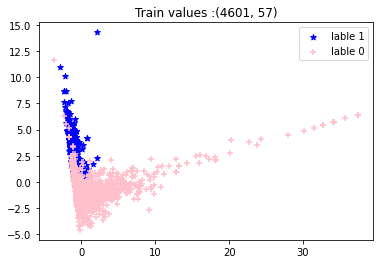

In [7]:
X_scaled = std_scaler.transform(X)
datax=pca.fit_transform(X_scaled)
x1=datax[(y==1)]
x2=datax[(y==0)]
plt.title('Train values :'+ str(X.shape))
plt.scatter(x1[:,0],x1[:,1],marker='*',c="blue")
plt.scatter(x2[:,0],x2[:,1],marker='+',c="pink")
plt.legend(['lable 1','lable 0'])

In [8]:
class RatingModel:
    def __init__(self, y_, y_Pr):
      self.y_=y_
      self.y_Pr=y_Pr
      self.TN=np.size(y_Pr[(y_Pr==-1)&(y_==y_Pr)])
      self.FN=np.size(y_Pr[(y_Pr==-1)&(y_!=y_Pr)])
      self.TP=np.size(y_Pr[(y_Pr==1)&(y_==y_Pr)])
      self.FP=np.size(y_Pr[(y_Pr==1)&(y_!=y_Pr)])
      self.y_[self.y_==0]=-1
      self.y_Pr[self.y_Pr==0]=-1
      # assert self.y_.set={1, -1}
      # assert self.y_Pr.set={1, -1}
    def __rep__():
        return ""
    def accur_Error(self, y_, y_Pr):
        rs=(self.TP+self.TN)/(y_.size)
        return [rs,(1-rs)]
    def sensitivity(self):
        P=np.size(self.y_[self.y_==1])
        return (self.TP)/(P)
    def specificity(self):
        N=np.size(self.y_[self.y_==-1])
        return (self.TN)/(N)
    def precision(self):
        rs=self.TP+self.FP
        return (self.TP)/(rs)
    def recall(self):
        rs=self.TP+self.FN
        return (self.TP)/(rs)
    def rating(self):
        return [self.accur_Error(self.y_, self.y_Pr), self.sensitivity(), self.specificity(), self.precision(), self.recall()]

In [9]:
class DecisionStump:
    def __init__(self, T=100):
        self.T = T
        pass

    def fit(self, X: np.ndarray, y: np.ndarray, sample_weight: np.ndarray):
        T = self.T
        W=sample_weight
        nrow, ncol = X.shape
        assert nrow == y.size

        bestn = 0
        bestd = 1
        bestp = 0
        minerr = W.sum()
        for i in range(ncol):
            err, d, p = self._optimize(X[:, i], y, W, T)
            if err < minerr:
                minerr = err
                bestn = i
                bestd = d
                bestp = p
        
        self.features = ncol
        self.bestn = bestn
        self.bestd = bestd
        self.bestp = bestp

        return self

    def _optimize(self, X, y, W, T):
        X = X.flatten()
        min_x, max_x = X.min(), X.max()
        len_x = max_x - min_x
        
        bestd = 1
        bestp = min_x
        minerr = W.sum()

        if len_x > 0.0:
            for p in np.arange(min_x, max_x, len_x/T):
                for d in [-1, 1]:
                    gy = np.ones((y.size))
                    gy[X*d < p*d] = -1
                    err = np.sum((gy != y)*W)
                    if err < minerr:
                        minerr = err
                        bestd = d
                        bestp = p

        return minerr, bestd, bestp

    def predict(self, test_set : np.ndarray):
        nrow, ncol = test_set.shape

        assert ncol == self.features

        icol = test_set[:, self.bestn]
        h = np.ones((nrow))
        h[icol*self.bestd < self.bestp*self.bestd] = -1
        return h

In [10]:
class AdaBoost:
    def __init__(self , T, hmodel = DecisionStump()):
        self.T=T
        self.hmodel=hmodel
    def fit(self, X: np.ndarray, y_: np.ndarray, verbose=False):
      n = X.shape[0]
      T = self.T
      y=y_
      y[y==0]=-1
      self.D = np.zeros(shape=(T, n))
      self.h = np.zeros(shape=T, dtype=object)
      self.alpha = np.zeros(shape=T)
      self.errors = np.zeros(shape=T)
      self.ratting = np.zeros(shape=(T,2))

      self.D[0] = np.ones(shape=n) / n

      for t in range(T):
          D_ = self.D[t]
          h_ = DecisionStump(40)
          h_ = h_.fit(X, y, D_)

          Pr_ = h_.predict(X)
          error_ = D_[(Pr_ != y)].sum()# / n
          alpha_ = np.log((1 - error_) / error_) / 2

          D_new = (
              D_ * np.exp(-alpha_ * y * Pr_)
          )
          
          D_new /= D_new.sum()

          # If not final iteration, update sample weights for t+1
          if t+1 < T:
              self.D[t+1] = D_new

          self.h[t] = h_
          self.alpha[t] = alpha_
          self.errors[t] = error_

          if t>0:
            Pr_temp=self.predictmodul(X,t)
            modelra=RatingModel(y, Pr_temp)
            self.ratting[t,:]=modelra.accur_Error(y, Pr_temp)
            if verbose: print('{0}-th weak: accuracy={1}, error={2}'.format (t, self.ratting[t,0], self.ratting[t,1]))
      return self
    def predict(self, X):
        Pr_ = np.array([h_.predict(X) for h_ in self.h])
        return np.sign(np.dot(self.alpha, Pr_))
    def predictmodul(self, X, i):
        h_temp=self.h[:i]
        alpha_temp=self.alpha[:i]
        Pr_ = np.array([h_.predict(X) for h_ in h_temp])
        return np.sign(np.dot(alpha_temp, Pr_))

In [11]:
model=AdaBoost(60)
model=model.fit(X_train_scaled, y_train,  True )
Pr=model.predict( X_test_scaled)
Pr[(Pr==0)]=-1

1-th weak: accuracy=0.7732919254658385, error=0.22670807453416153
2-th weak: accuracy=0.7732919254658385, error=0.22670807453416153
3-th weak: accuracy=0.8031055900621118, error=0.1968944099378882
4-th weak: accuracy=0.8145962732919255, error=0.18540372670807448
5-th weak: accuracy=0.8419254658385094, error=0.15807453416149064
6-th weak: accuracy=0.8456521739130435, error=0.15434782608695652
7-th weak: accuracy=0.8450310559006211, error=0.1549689440993789
8-th weak: accuracy=0.8608695652173913, error=0.13913043478260867
9-th weak: accuracy=0.8642857142857143, error=0.13571428571428568
10-th weak: accuracy=0.8720496894409938, error=0.1279503105590062
11-th weak: accuracy=0.867080745341615, error=0.13291925465838506
12-th weak: accuracy=0.8888198757763975, error=0.11118012422360246
13-th weak: accuracy=0.8791925465838509, error=0.12080745341614907
14-th weak: accuracy=0.8959627329192547, error=0.10403726708074534
15-th weak: accuracy=0.8773291925465838, error=0.12267080745341619
16-th we

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y-" (-> color='y'). The keyword argument will take precedence.
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "y--" (-> color='y'). The keyword argument will take precedence.
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Loss/Accuracy')

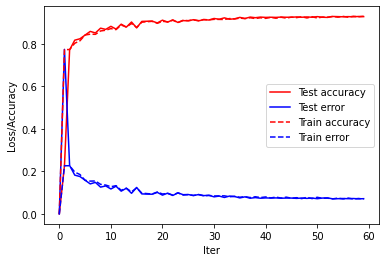

In [12]:
ra_Xtest = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_test_scaled,i)
  modelra=RatingModel(y_test, Pr_i)
  ra_Xtest[i,:]=modelra.accur_Error(y_test, Pr_i)
ra_Xtrain = np.zeros(shape=(model.T,2))
for i in range(1,model.T):
  Pr_i=model.predictmodul(X_train_scaled,i)
  modelra=RatingModel(y_train, Pr_i)
  ra_Xtrain[i,:]=modelra.accur_Error(y_train, Pr_i)
iter=range(model.T)
plt.plot(iter,ra_Xtest[:,0],'y-',c="red",label='Test accuracy')
plt.plot(iter,ra_Xtest[:,1],'r-',c="blue",label='Test error')
plt.plot(iter,ra_Xtrain[:,0],'y--',c="red",label='Train accuracy')
plt.plot(iter,ra_Xtrain[:,1],'r--',c="blue",label='Train error')
plt.legend(loc='center right')
plt.xlabel('Iter')
plt.ylabel('Loss/Accuracy')

100 (1381,)


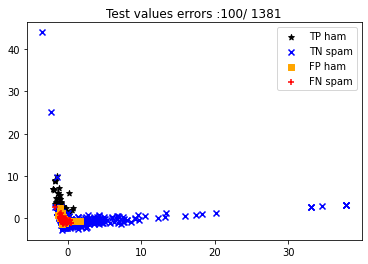

In [13]:
sumerror=0;
y_new=y_test
y_new[y_new==0]=-1
for i in range(y_new.shape[0]):
  if y_new[i]!=Pr[i]: 
    sumerror+=1
print(sumerror, y_new.shape)
gT1=data2[(Pr==1)]
gT0=data2[(Pr==-1)]
gF1=data2[(y_new!=Pr)&(Pr==1)]
gF0=data2[(y_new!=Pr)&(Pr==-1)]
plt.title('Test values errors :'+str(sumerror)+'/ '+str(X_test_scaled.shape[0]))

plt.scatter(gT1[:,0],gT1[:,1],c="black",marker='*')
plt.scatter(gT0[:,0],gT0[:,1],c="blue",marker='x')
plt.scatter(gF1[:,0],gF1[:,1],c="orange",marker='s')
plt.scatter(gF0[:,0],gF0[:,1],c="red",marker='+')
plt.legend(['TP ham','TN spam','FP ham','FN spam'])